In [9]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
Meteorology_2020= pd.read_excel('/Users/iditbela/Documents/Broday/Broday_notebooks/meteo_2020.xlsx')

In [11]:
dates = Meteorology_2020['Date']

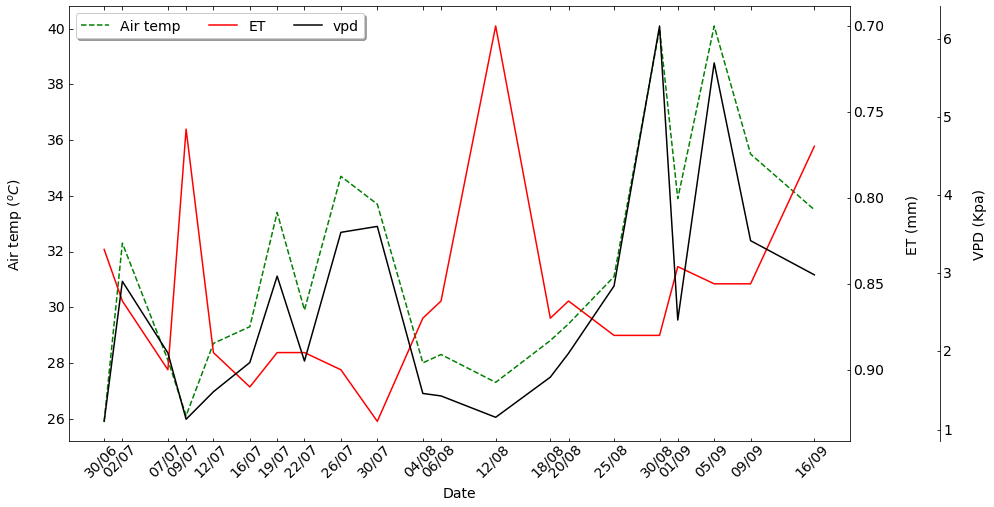

In [12]:
fig = plt.figure(figsize = (14,8))
host = host_subplot(111, axes_class=AA.Axes)
# plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 90
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par1.axis["right"].toggle(all=True)

host.set_xlabel("\nDate")
host.set_ylabel("Air temp $(^oC)$\n")
par1.set_ylabel("\nET (mm)")
par2.set_ylabel("\nVPD (Kpa)")


p1, =host.plot(dates,Meteorology_2020['T'],'g--',label='Air temp')
p2, =par1.plot(dates,Meteorology_2020['ET'],'r-',label='ET')
p3, =par2.plot(dates,Meteorology_2020['VPD KPa'],'k-', label="vpd")


host.legend(loc = 'best',#bbox_to_anchor=(0.4, 0.98),
          ncol=3, fancybox=True, shadow=True)
par1.invert_yaxis()

host.set_xticks(dates)

myFmt = mdates.DateFormatter('%d/%m')
host.xaxis.set_major_formatter(myFmt)

plt.setp(host.axis["bottom"].major_ticklabels, rotation=45)
plt.setp(host.axis["bottom"].major_ticklabels, pad=12)

plt.rcParams.update({'font.size': 14})

# plt.draw()
plt.show()
